# Gramener Case Study-Business Objective
## To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default from the given loan data set


## The analysis is divided into four main parts:

#### A. Importing, Reading & Understanding Data
#### B. Data cleaning
#### C. Data Analysis
#### D. Recommendations

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages and matplotlib and seaborn libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing, Reading & Understanding Data

In [3]:
loan = pd.read_csv("C:/Users/Himanshu/Desktop/Python/EDA Assignment/loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
## Code for inspection of DF
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
## Code for inspection of DF
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
## Code for inspection of DF
loan.shape

(39717, 111)

The target variable, which we want to compare across the independent variables, is loan status. We have to figure out & compare the average default rates across various independent variables and identify the ones that affect default rate the most.

# Data Cleaning

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [7]:
#Inspecting Null values
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
#Inspecting percentage of null values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


You can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [9]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [11]:
#Inspecting percentage of null values again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent

# let's have a look at a few entries in the columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis.

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

Thus let's drop the two columns.

In [13]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
#Inspecting percentage of null values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are some more columns with missing values, but let's ignore them for now (since we are ntot doing any modeling, we don't need to impute all missing values anyway).

But let's check whether some rows have a large number of missing values.

In [15]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [16]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large. Let's also check whether all columns are in the correct format

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [18]:
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [19]:
# checking the data types again
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [20]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# A regular expression is commonly used to search for a pattern in a text
# using regular expression to extract numeric values from the string(eg <1 will give 1, 10+ will give 10). 
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [21]:
# looking at column type again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [22]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
# inspecting changed values in emp_length column
loan.loc[:, ['emp_length']].head()

,emp_length
0,10
1,1
2,10
3,10
4,1


# Data Analysis

Let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify the variables of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

These can be of types- 1. those which are related to the applicant (personal variables such as age, occupation, employment details etc.), 2. loan related variables (amount of loan, interest rate, purpose of loan etc.) and 3. After loan behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the after loan behaviour variables are not available at the time of loan application, and thus they cannot be used as pointers for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [24]:
# These variables(past loans) are readily available with credit bureau
AfterLoan_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
AfterLoan_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [25]:
# let's now remove the After loan behaviour variables from analysis
df = loan.drop(AfterLoan_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [26]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [27]:
#Let's relabel loan_status's values to binary form - 0 or 1. 1 indicating that the person has defaulted and 0 otherwise.

df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

#### Now, ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. 
#### Also, let's tag the other two values as 0 or 1

In [28]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# Univariate Analysis

Let's see average of loan default

In [29]:
# average of loan default
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%.

Let's first visualise the average default rates across categorical variables.

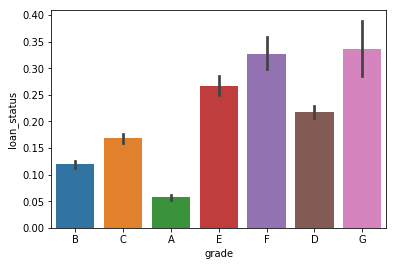

In [30]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [31]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

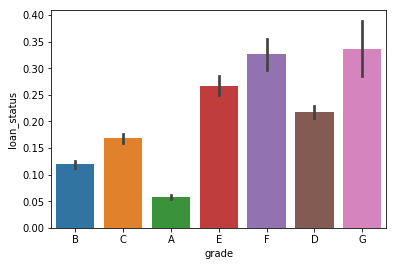

In [32]:
# compare defaults across grade of loan
plot_cat('grade')

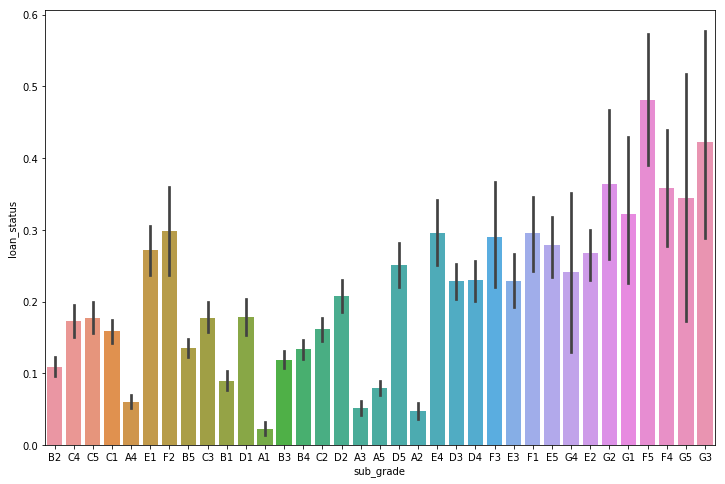

In [33]:
# compare defaults across sub_grade of loan
plt.figure(figsize=(12, 8))
plot_cat('sub_grade')

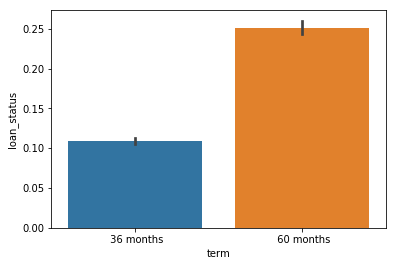

In [34]:
# Let's look into the term
plot_cat('term')

60 months term loans default more than 36 months term loans

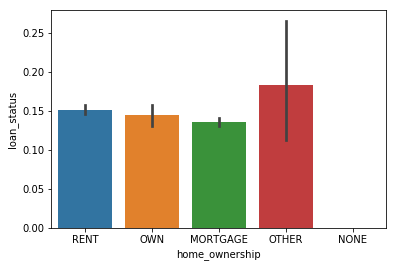

In [35]:
# Let's look into the home_ownership
plot_cat('home_ownership')

Not much inferences in home ownership

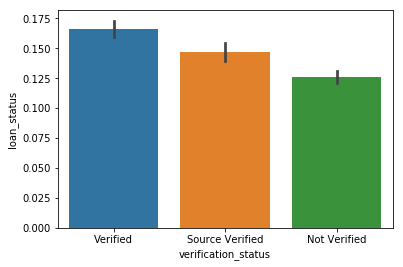

In [36]:
#Lets look into the verification status
plot_cat('verification_status')

surprisingly, verified loans default more than not verified ones

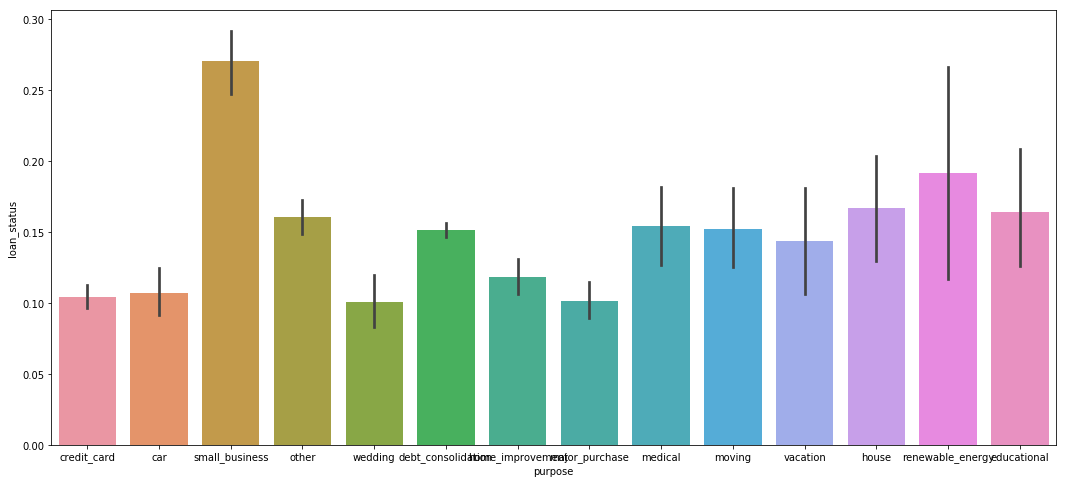

In [37]:
#Let's look into the purpose of loans
plt.figure(figsize=(18, 8))
plot_cat('purpose')

In [38]:
# let's look into the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [39]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [40]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [41]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

We see that the number of loans has increased steadily across years.

In [42]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Loans gradually increase from jan to dec and maximum loans are granted in dec

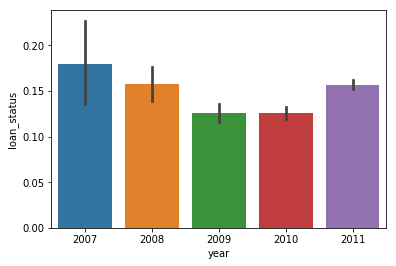

In [43]:
# lets compare the defaults across years
plot_cat('year')

the default rate was reducing from 2008 till 2010 had suddenly increased in 2011

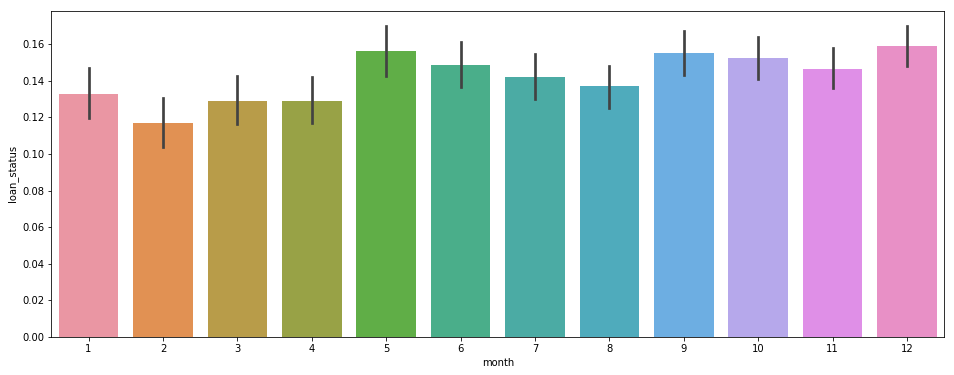

In [44]:
# comparing defaults across months: 
plt.figure(figsize=(16, 6))
plot_cat('month')

not much variation/trend is seen across months

### Let's now analyse variation across continuous variables.

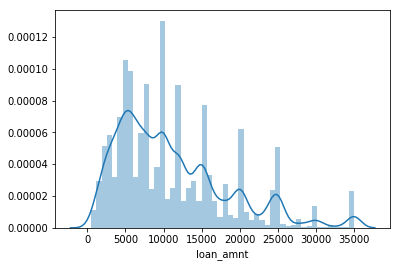

In [45]:
# Let's look into the loan amount
sns.distplot(df['loan_amnt'])
plt.show()

the median loan amount is around 10,000

#### Lets try out categorising the loan variable into discrete categories like small, medium, high and very high

In [46]:
# For loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [47]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

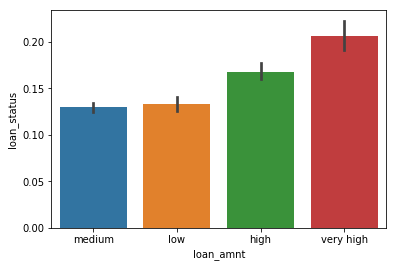

In [48]:
# Now let's compare the defaults across loan amount type
plot_cat('loan_amnt')

So, Higher the loan amount, higher the loan defaults

In [49]:
# Funding amount is also a continous variable, so, let's also convert funded amount invested to categories
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

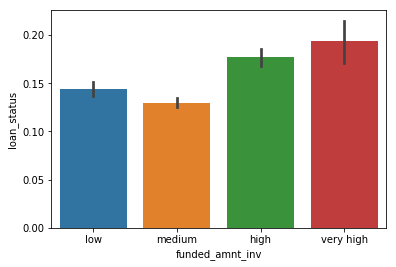

In [50]:
# Let's plot funded amount invested
plot_cat('funded_amnt_inv')

In [51]:
# Let's check how interest rate plays it's part
# Convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

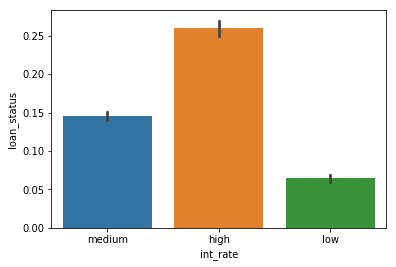

In [52]:
# Ploting defaults across rates of interest
plot_cat('int_rate')

High interest rates contributes to more default, as expected

In [53]:
# Let's check how debt to income ratio(dti) plays it's part 
# categorising debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

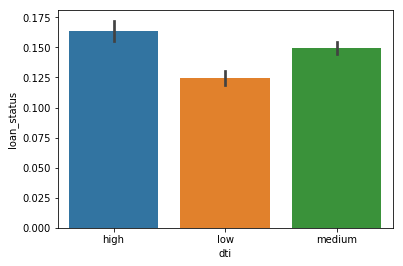

In [54]:
# Plotting defaults across debt to income ratio
plot_cat('dti')

As expected, higher the dti, higher the defaults

### Lets do the same for all other parameters

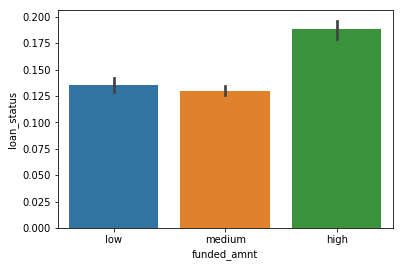

In [55]:
# For funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))


plot_cat('funded_amnt')

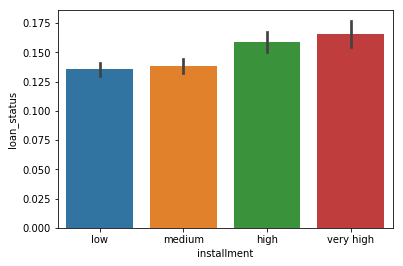

In [56]:
# For installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

plot_cat('installment')

Higher the installment amount gives higher the defaults

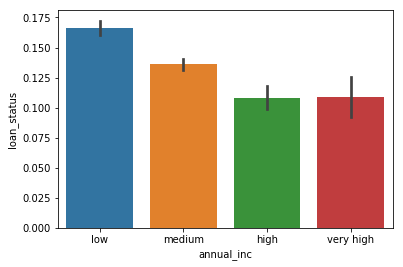

In [57]:
# For annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

plot_cat('annual_inc')

As expected, lower the annual income, gives higher defaults

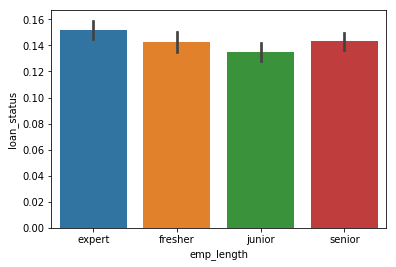

In [58]:
# For employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# segmenting the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

plot_cat('emp_length')

No clear trends here

# Segmented Univariate Analysis

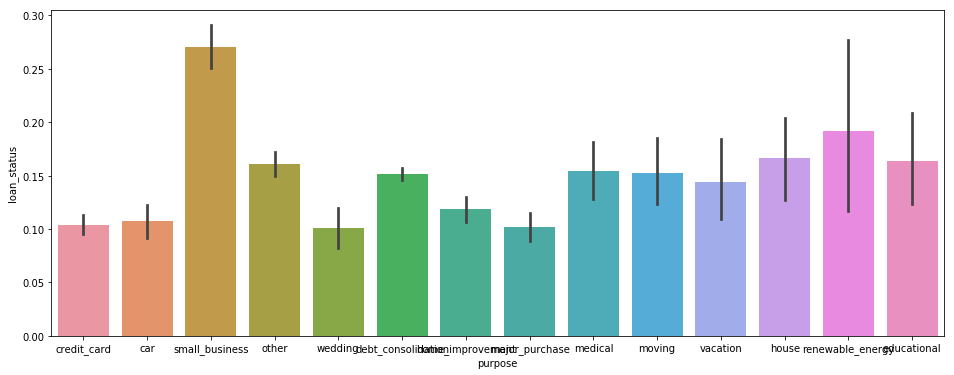

In [59]:
# Let's look into the defaults across the purpose of the loan.
plt.figure(figsize=(16, 6))
plot_cat('purpose')

Small business loans defualt the most, then renewable energy and education

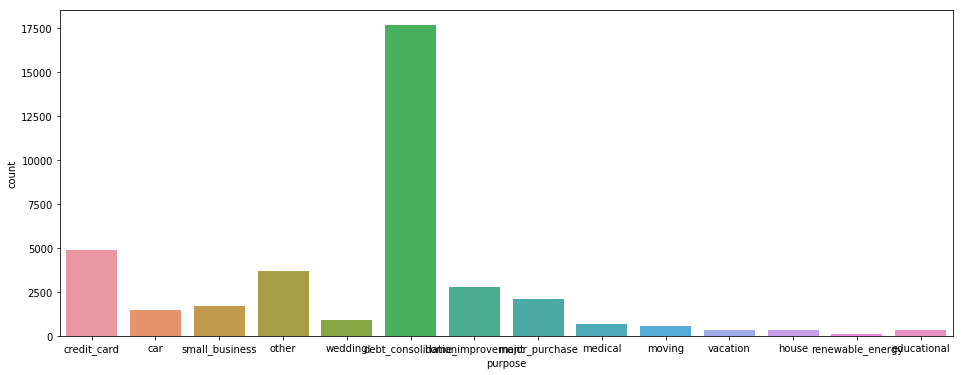

In [60]:
# Now lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

Most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.

#### Lets analyse top 4 types from above purpose: consolidation, credit card, home improvement and major purchase. 

In [61]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

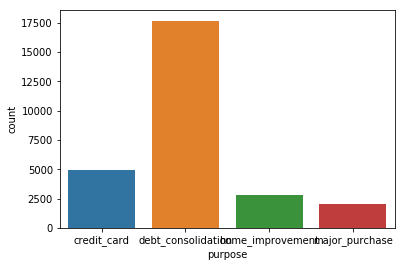

In [62]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

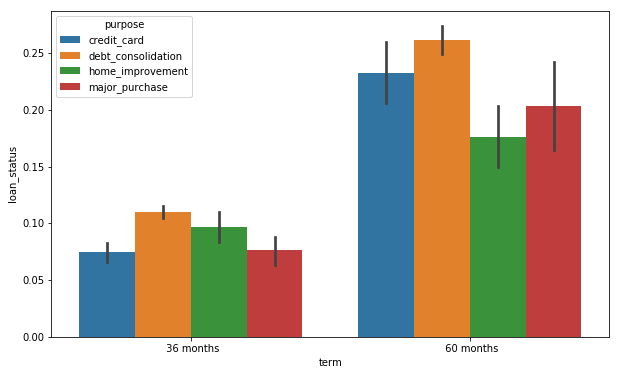

In [63]:
# let's now compare the defaults across two types of categorical variables-term and loan status

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

### Lets do it for other categories also

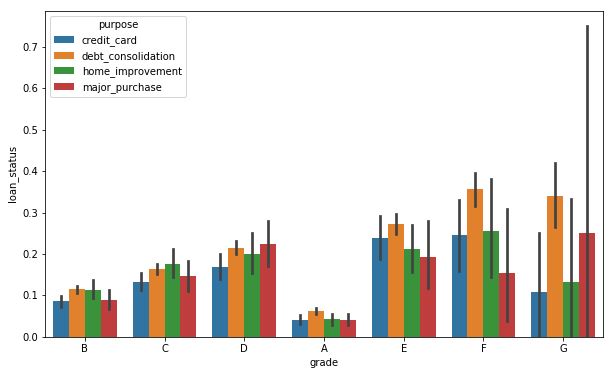

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)
plt.show()

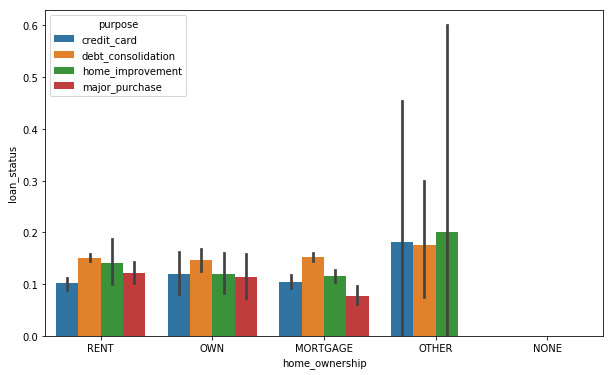

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=df)
plt.show()

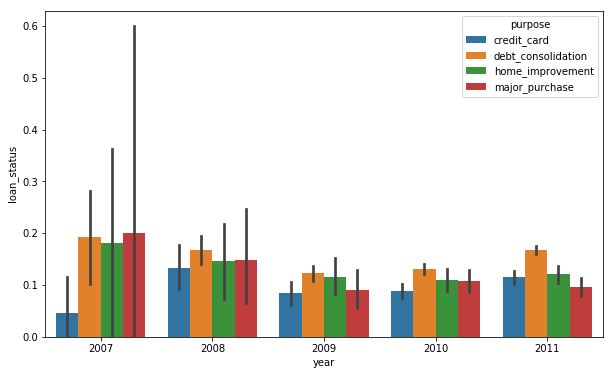

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='loan_status', hue='purpose', data=df)
plt.show()

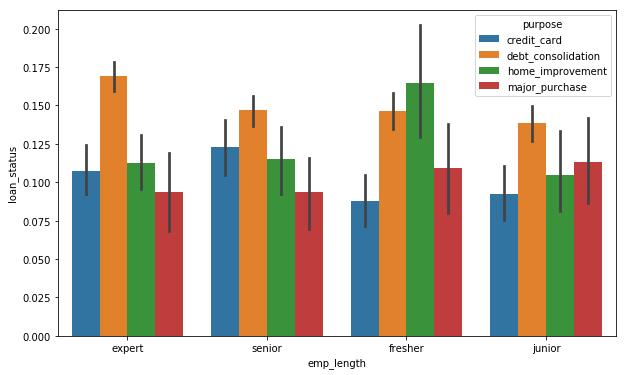

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=df)
plt.show()

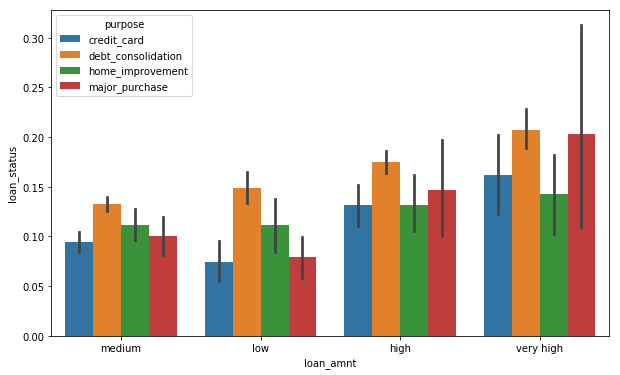

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=df)
plt.show()

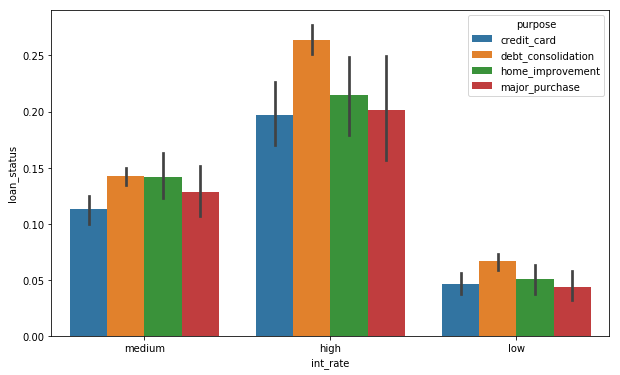

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=df)
plt.show()

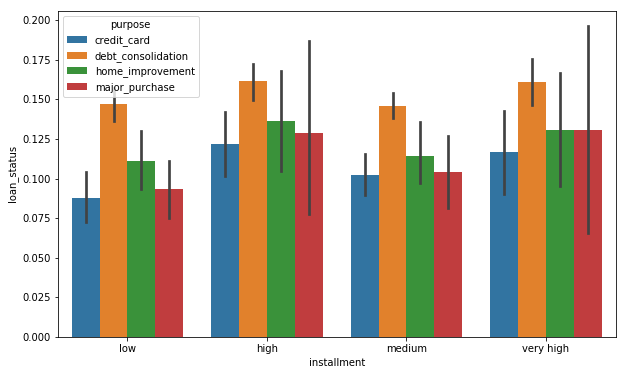

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installment', y='loan_status', hue='purpose', data=df)
plt.show()

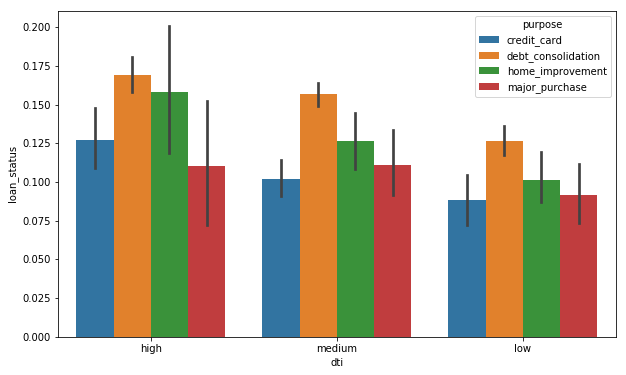

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dti', y='loan_status', hue='purpose', data=df)
plt.show()

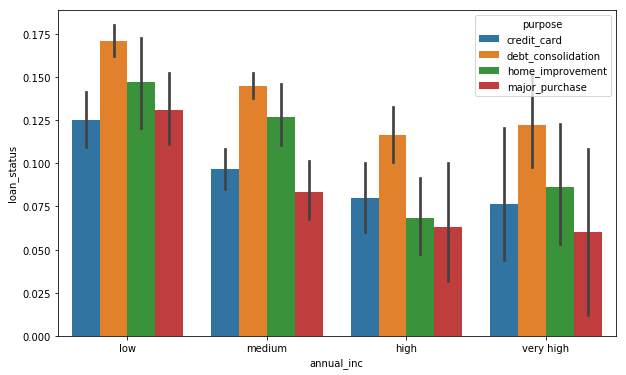

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=df)
plt.show()

Let's see the variation in default eg. lets see in annual_inc as the categorical variable.

In [73]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

Thus, there is a 6% increase in default rate as you go from high to low annual income(9.7% to 15.7%). We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

#### Let's do it for all other categories 

In [74]:
# variation of default rate across dti
df.groupby('dti').loan_status.mean().sort_values(ascending=False)

dti
high      0.158028
medium    0.140915
low       0.112774
Name: loan_status, dtype: float64

Variation of 4.5% from low to high

In [75]:
# variation of default rate across installment
df.groupby('installment').loan_status.mean().sort_values(ascending=False)

installment
high         0.151245
very high    0.149563
medium       0.132338
low          0.124067
Name: loan_status, dtype: float64

Variation of 2.7% from low to high

In [76]:
# variation of default rate across int_rate
df.groupby('int_rate').loan_status.mean().sort_values(ascending=False)

int_rate
high      0.247708
medium    0.135779
low       0.057907
Name: loan_status, dtype: float64

Variation is approx 19%

In [77]:
# variation of default rate across loan_amnt
df.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False)

loan_amnt
very high    0.192518
high         0.162739
medium       0.120941
low          0.118952
Name: loan_status, dtype: float64

Variation is approx 7%

In [78]:
# variation of default rate across emp_length
df.groupby('emp_length').loan_status.mean().sort_values(ascending=False)

emp_length
expert     0.146238
senior     0.135371
fresher    0.132705
junior     0.125000
Name: loan_status, dtype: float64

In [80]:
# variation of default rate across home_ownership
df.groupby('home_ownership').loan_status.mean().sort_values(ascending=False)

home_ownership
OTHER       0.158730
RENT        0.139228
OWN         0.135448
MORTGAGE    0.132571
NONE        0.000000
Name: loan_status, dtype: float64

Variation is approx 16%

In [81]:
# variation of default rate across grade
df.groupby('grade').loan_status.mean().sort_values(ascending=False)

grade
F    0.326418
G    0.291866
E    0.258291
D    0.207573
C    0.158259
B    0.107344
A    0.052670
Name: loan_status, dtype: float64

In [84]:
# variation of default rate across sub_grade
df.groupby('sub_grade').loan_status.mean().sort_values(ascending=False)

sub_grade
F5    0.482353
G3    0.454545
F4    0.382609
G2    0.321429
G1    0.296875
F3    0.296875
G5    0.294118
F1    0.289474
E5    0.287770
F2    0.281437
E4    0.271605
E2    0.264901
E1    0.259191
D5    0.228758
D4    0.228277
E3    0.217391
D3    0.209677
D2    0.202944
C3    0.173953
D1    0.171598
C4    0.168591
C5    0.165025
C2    0.147205
C1    0.147120
B5    0.124606
B4    0.119678
B3    0.109630
G4    0.102564
B2    0.091036
B1    0.078947
A5    0.066424
A4    0.055860
A2    0.048387
A3    0.047779
A1    0.020029
Name: loan_status, dtype: float64

Variation is approx 46%

In [82]:
# variation of default rate across term
df.groupby('term').loan_status.mean().sort_values(ascending=False)

term
 60 months    0.245095
 36 months    0.099039
Name: loan_status, dtype: float64

Variation is approx 15%

In [83]:
# variation of default rate across purpose
df.groupby('purpose').loan_status.mean().sort_values(ascending=False)

purpose
debt_consolidation    0.151570
home_improvement      0.118492
credit_card           0.104103
major_purchase        0.101442
Name: loan_status, dtype: float64

Variation is approx 5%

Other Variations are as following:-
'funded_amnt_inv': 6.0, 'pymnt_plan': 0.0, 'verification_status': 4.0, 'emp_title': 100.0,'funded_amnt': 5.0, 'installment': 3.0, 'initial_list_status': 0.0.